In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn import linear_model, naive_bayes, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from imblearn import over_sampling

In [11]:
'''
Dataset
  - Same code as in DecTrees, NB, SVM - see figure there for oversampling
'''
# Load data
data = pd.read_csv('Data/ads_data_clean.csv')
data_EN = data.copy()
citation_count_label = []
for i in range(len(data)):
    row = data.iloc[i]
    label = 'LowCC' if row['citation_count'] <= -0.27 else 'LowMedCC' if  row['citation_count'] <= 0.16 else 'HighMedCC' if row['citation_count'] <= 1.03 else 'HighCC' if row['citation_count'] <= 2.25 else 'VeryHighCC' # label = 'Verylow' if row['citation_count'] < -0.5 else 'Low' if row['citation_count'] < 0 else 'Med' if row['citation_count'] < 1 else 'High' if row['citation_count'] < 2.5 else 'Veryhigh'
    citation_count_label.append(label)
data_EN['citation_count_label'] = citation_count_label
data_EN.drop(columns=['bibcode', 'doi', 'aff', 'bibstem', 'arxiv_class', 'citation_count'], inplace=True)
data_EN.to_csv('Data/ads_data_SVM.csv', index=False)
display(data_EN)

# Split into X and y and train and test
X = data_EN.drop(columns=['citation_count_label'])
y = data_EN['citation_count_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply oversampling to training set
sm = over_sampling.RandomOverSampler(random_state=0)
X_train, y_train = sm.fit_resample(X_train, y_train)
display(X_train); display(X_test)

,author_count,year,read_count,download_count,journal_rank,citation_count_label
0,-0.342659,0.399746,15.781133,0.691080,-0.718169,LowCC
1,0.411490,0.191319,5.439945,4.147883,-0.405034,VeryHighCC
2,-0.342659,1.025027,1.420615,-0.940852,-0.207874,LowCC
3,0.746667,-0.642389,6.174266,3.974185,-0.405034,VeryHighCC
4,-0.334280,-1.267670,3.746686,2.386458,-0.526809,VeryHighCC
...,...,...,...,...,...,...
987,-0.346849,-1.684524,-0.096406,0.183506,-0.613791,LowMedCC
988,-0.149932,-1.892951,0.557356,0.672878,-0.422430,LowMedCC
989,-0.296572,-1.892951,0.151535,0.377487,-0.439827,LowMedCC
990,-0.330090,-1.892951,0.280474,0.536624,3.312001,LowMedCC


,author_count,year,read_count,download_count,journal_rank
0,-0.330090,-0.642389,0.490187,1.051998,-0.439827
1,-0.342659,-0.642389,0.231447,0.380607,0.806917
2,-0.233727,1.025027,-0.101806,0.090937,-0.405034
3,0.093071,1.025027,-0.771766,-0.888846,-0.207874
4,-0.200209,1.025027,-0.434626,-0.456681,-0.405034
...,...,...,...,...,...
1945,0.759236,-1.059243,3.891823,2.679769,-0.405034
1946,0.759236,-1.059243,3.891823,2.679769,-0.405034
1947,0.235522,-0.225535,1.195351,-0.092123,-0.422430
1948,3.893144,-0.642389,3.468940,2.160234,-0.248466


,author_count,year,read_count,download_count,journal_rank
213,-0.271434,-1.059243,0.929484,0.404010,-0.526809
331,-0.279813,-1.684524,1.061878,1.319306,3.312001
501,-0.183450,1.025027,-0.862044,-0.952293,-0.718169
309,0.315126,1.025027,-0.604168,-0.716708,-0.207874
88,2.590142,-0.850816,-0.137874,-0.510247,-0.509412
...,...,...,...,...,...
705,-0.237916,1.025027,-0.831375,-0.932011,3.312001
305,0.130779,0.816600,-0.503738,-0.533129,-0.207874
809,-0.346849,-1.267670,-0.409141,-0.622058,1.873897
237,-0.263055,1.025027,-0.644555,-0.613737,-0.445625


Classification report for Bagging Clasifier (10 Linear SVM with C = 0.5):
               precision    recall  f1-score   support

       LowCC       0.36      0.42      0.38        12
    LowMedCC       0.68      0.46      0.55        41
   HighMedCC       0.96      0.88      0.91        98
      HighCC       0.61      0.81      0.70        47
  VeryHighCC       0.00      0.00      0.00         1

    accuracy                           0.74       199
   macro avg       0.52      0.51      0.51       199
weighted avg       0.78      0.74      0.75       199



Text(0.5, 1.0, 'Confusion Matrix for Bagging Clasifier (10 Linear SVM with C = 0.5)')

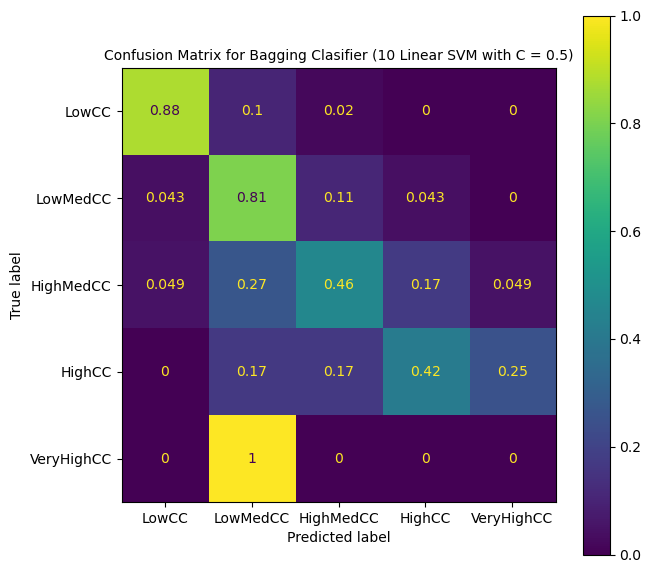

In [12]:
'''
SVM Ensemble
'''

SVM = svm.SVC(C=0.5, kernel='linear', gamma="auto")
BC = BaggingClassifier(estimator=SVM, n_estimators=10, random_state=0)
model = BC.fit(X_train, y_train)
preds = model.predict(X_test)
print(f'Classification report for Bagging Clasifier (10 Linear SVM with C = 0.5):\n {metrics.classification_report(y_test, preds, target_names=["LowCC", "LowMedCC", "HighMedCC", "HighCC", "VeryHighCC"])}')#{np.round(metrics.accuracy_score(y_test, preds)*100,2)}%')
cm = metrics.confusion_matrix(y_test, preds, labels=['LowCC', 'LowMedCC', 'HighMedCC', 'HighCC','VeryHighCC'], normalize='true') # print(y_test.value_counts(), print(np.sum(cm, axis=1))) # check that the number of each true label is correct, just for debugging
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['LowCC', 'LowMedCC', 'HighMedCC', 'HighCC', 'VeryHighCC'])
fig, ax = plt.subplots(figsize=(7,7))
disp.plot(ax=ax)
ax.set_title(f'Confusion Matrix for Bagging Clasifier (10 Linear SVM with C = 0.5)', fontsize=10)

Classification report for multimodel voter:
               precision    recall  f1-score   support

       LowCC       0.18      0.17      0.17        12
    LowMedCC       0.71      0.54      0.61        41
   HighMedCC       0.93      0.89      0.91        98
      HighCC       0.66      0.81      0.72        47
  VeryHighCC       0.00      0.00      0.00         1

    accuracy                           0.75       199
   macro avg       0.49      0.48      0.48       199
weighted avg       0.77      0.75      0.75       199



Text(0.5, 1.0, 'Confusion Matrix for Multi-Model Voter')

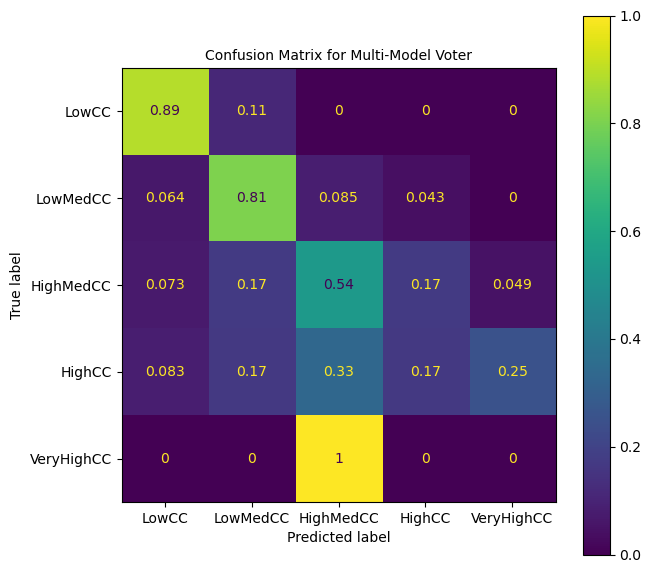

In [13]:
'''
Multi-Model Ensemble
'''

LR = linear_model.LogisticRegression()
SVM = svm.SVC(C=0.5, kernel='linear', gamma="auto")
GNB = naive_bayes.GaussianNB()
DT = DecisionTreeClassifier(criterion='gini', max_depth=10)
VC = VotingClassifier(estimators=[('LR', LR), ('SVM', SVM), ('GNB', GNB), ('DT', DT)], voting='hard')
model = VC.fit(X_train, y_train)
preds = model.predict(X_test)
print(f'Classification report for multimodel voter:\n {metrics.classification_report(y_test, preds, target_names=["LowCC", "LowMedCC", "HighMedCC", "HighCC", "VeryHighCC"])}')#{np.round(metrics.accuracy_score(y_test, preds)*100,2)}%')
cm = metrics.confusion_matrix(y_test, preds, labels=['LowCC', 'LowMedCC', 'HighMedCC', 'HighCC','VeryHighCC'], normalize='true') # print(y_test.value_counts(), print(np.sum(cm, axis=1))) # check that the number of each true label is correct, just for debugging
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['LowCC', 'LowMedCC', 'HighMedCC', 'HighCC', 'VeryHighCC'])
fig, ax = plt.subplots(figsize=(7,7))
disp.plot(ax=ax)
ax.set_title(f'Confusion Matrix for Multi-Model Voter', fontsize=10)

In [ ]:
'''
Comparison of all methods for presentation
'''

d = pd.DataFrame(columns = ['Model', 'Accuracy'])
d.loc[len(d)] = {'Model': 'Gaussian NB', 'Accuracy': 71.3}
d.loc[len(d)] = {'Model': 'Categorical NB', 'Accuracy': 70.4}
d.loc[len(d)] = {'Model': 'Multinomial NB', 'Accuracy': 55.9}
d.loc[len(d)] = {'Model': 'DT w/ Gini, Max Depth 10', 'Accuracy': 75.4}
d.loc[len(d)] = {'Model': 'DT w/ Gini, Max Depth 5', 'Accuracy': 69.3}
d.loc[len(d)] = {'Model': 'DT w/ Info Gain, Max Depth 10', 'Accuracy': 69.8}
d.loc[len(d)] = {'Model': 'Polynomial SVM', 'Accuracy': 73.4}
d.loc[len(d)] = {'Model': 'RBF SVM', 'Accuracy': 75.1}
d.loc[len(d)] = {'Model': 'Linear SVM', 'Accuracy': 76}
d = d.sort_values(by='Accuracy', ascending=False)
display(d)